# Apple Stock Forecast

In [1]:
import pandas as pd
apple_data = pd.read_csv('AAPL.csv')
apple_data.shape

(2011, 7)

In [3]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Converting 'Date' column to datatime format

In [5]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data.set_index('Date', inplace = True)
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


# Feature Engineering

# 1. Moving Averages (MA)

In [7]:
# Short-term & long-term moving averages
apple_data["MA_7"] = apple_data["Close"].rolling(window = 7).mean()
apple_data["MA_30"] = apple_data["Close"].rolling(window = 30).mean()
apple_data["MA_50"] = apple_data["Close"].rolling(window = 50).mean()
apple_data["MA_100"] = apple_data["Close"].rolling(window = 100).mean()

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100
Date,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN


In [9]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100
Date,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,259.6744,236.8043
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,260.6424,237.6068
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,261.7342,238.5725
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,262.8428,239.5005
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,263.9676,240.4253


# 2. Lag Features (Previous Closing Prices)

In [11]:
# Lag features - previous stock prices
apple_data["Lag_1"] = apple_data["Close"].shift(1)
apple_data["Lag_7"] = apple_data["Close"].shift(7)
apple_data["Lag_30"] = apple_data["Close"].shift(30)

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30
Date,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN


In [13]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30
Date,,,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,259.6744,236.8043,279.440002,271.459991,260.140015
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,260.6424,237.6068,284.000000,275.149994,262.200012
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,261.7342,238.5725,284.269989,279.859985,261.959991
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,262.8428,239.5005,289.910004,280.410004,264.470001
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,263.9676,240.4253,289.799988,279.739990,262.640015


# 3. Volatility Indicators

In [15]:
# Rolling standard deviation for volatility tracking
apple_data["Volatility_7"] = apple_data["Close"].rolling(window = 7).std()
apple_data["Volatility_30"] = apple_data["Close"].rolling(window = 30).std()

apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30
Date,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN


In [17]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30
Date,,,,,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,259.6744,236.8043,279.440002,271.459991,260.140015,2.576166,6.938819
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,260.6424,237.6068,284.000000,275.149994,262.200012,2.091410,7.381592
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,261.7342,238.5725,284.269989,279.859985,261.959991,3.824892,8.131139
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,262.8428,239.5005,289.910004,280.410004,264.470001,4.533700,8.786240
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,263.9676,240.4253,289.799988,279.739990,262.640015,4.910280,9.376821


# 4. Daily Return Calculation

In [19]:
# Percentage change in Close price
apple_data["Daily_Return"] = apple_data["Close"].pct_change()

In [21]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return
Date,,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN,0.005374
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN,0.011102
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN,0.010454
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN,-0.001586


In [23]:
apple_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return
Date,,,,,,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,279.802852,268.701334,259.6744,236.8043,279.440002,271.459991,260.140015,2.576166,6.938819,0.016318
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,281.105708,269.436999,260.6424,237.6068,284.000000,275.149994,262.200012,2.091410,7.381592,0.000951
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,282.541425,270.368667,261.7342,238.5725,284.269989,279.859985,261.959991,3.824892,8.131139,0.019840
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,283.882852,271.212999,262.8428,239.5005,289.910004,280.410004,264.470001,4.533700,8.786240,-0.000379
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,285.565709,272.175665,263.9676,240.4253,289.799988,279.739990,262.640015,4.910280,9.376821,0.005935


# Checking for Stationarity - ADF Test

In [25]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(apple_data['Close'].dropna())

print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Statistic: 1.2193701254377989
p-value: 0.9961170178032009
Critical Values: {'1%': -3.433622218212895, '5%': -2.8629854902259004, '10%': -2.5675395171404802}


In [27]:
if adf_test[1] < 0.05:
    print("Data is stationary. No need for differencing.")
else:
    print("Data is non-stationary. Apply differencing...")

Data is non-stationary. Apply differencing...


In [29]:
apple_data["Close_Diff"] = apple_data["Close"].diff().dropna()

In [31]:
adf_test_diff = adfuller(apple_data['Close_Diff'].dropna())
print("New ADF p-value:", adf_test_diff[1])

New ADF p-value: 1.7631231987211183e-25


# Plotting the Differenced Series (Close_Diff)- to Check if the trend is removed visually

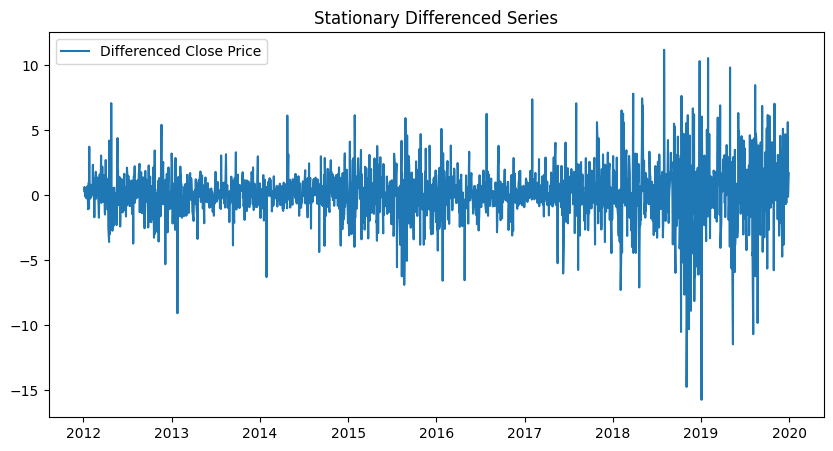

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(apple_data['Close_Diff'], label = "Differenced Close Price")
plt.legend()
plt.title("Stationary Differenced Series")
plt.show()

# Determining ARIMA Parameters using ACF & PACF

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

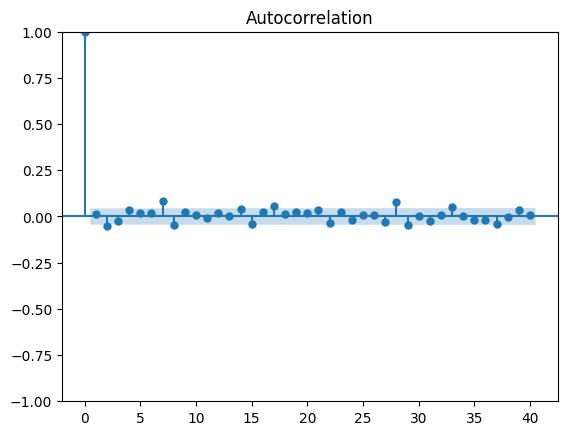

In [37]:
# Plotting ACF (To find q)
plot_acf(apple_data['Close_Diff'].dropna(), lags=40)
plt.show()

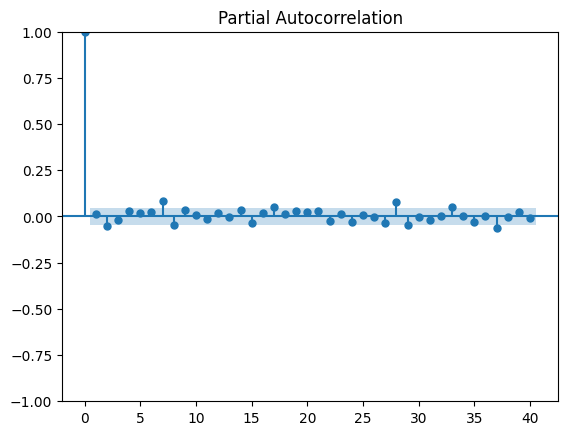

In [39]:
# Plotting PACF (To find p)
plot_pacf(apple_data['Close_Diff'].dropna(), lags=40)
plt.show()

# Train-Test Split (2012–2018 for Train, 2019 for Test)

In [41]:
apple_data.index.min()

Timestamp('2012-01-03 00:00:00')

In [43]:
apple_data.index.max()

Timestamp('2019-12-30 00:00:00')

In [45]:
apple_data.groupby(apple_data.index.year).count()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return,Close_Diff
Date,,,,,,,,,,,,,,,,,
2012,250,250,250,250,250,250,244,221,201,151,249,243,220,244,221,249,249
2013,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
2014,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
2015,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
2016,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
2017,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
2018,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
2019,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251


In [47]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,MA_50,MA_100,Lag_1,Lag_7,Lag_30,Volatility_7,Volatility_30,Daily_Return,Close_Diff
Date,,,,,,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,NaN,NaN,NaN,NaN,58.747143,NaN,NaN,NaN,NaN,0.005374,0.315716
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,NaN,NaN,NaN,NaN,59.062859,NaN,NaN,NaN,NaN,0.011102,0.655712
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,NaN,NaN,NaN,NaN,59.718571,NaN,NaN,NaN,NaN,0.010454,0.624286
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,NaN,NaN,NaN,NaN,60.342857,NaN,NaN,NaN,NaN,-0.001586,-0.095714


In [49]:
from sklearn.model_selection import train_test_split

In [51]:
train_data = apple_data[apple_data.index < "2019-01-01"]
train_data.shape

(1760, 17)

In [53]:
test_data = apple_data[apple_data.index >= "2019-01-01"]
test_data.shape

(251, 17)

# Model Building - Building a Time Series Model

# ARIMA Model - AutoRegressive Integrated Moving Average

In [59]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/614.7 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/614.7 kB 1.4 MB/s eta 0:00:01
   ---- ---------------------------------- 71.7/614.7 kB 563.7 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/614.7 kB 563.7 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/614.7 kB 751.6 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/614.7 kB 751.6 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/614.7 kB 689.2 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/614.7 kB 689.2 kB/s eta 0:00:01
   -------------------- ----------------- 327.7/614.7 kB 754.0 kB/s eta 0:00:01
   -------------------- ----------------- 337.9/614.7 kB 749.8 kB/s eta 0:00:01
   ---------------------- --------------- 358.4/614.7 kB 676.0 kB/s eta 0:00:01
   --------------------------- ---------- 440.3/614

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [55]:
from pmdarima import auto_arima

auto_model = auto_arima(train_data['Close_Diff'].dropna(), seasonal=False, trace=True)
print(auto_model.summary())

C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\m

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7282.215, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7285.503, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7285.716, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7285.534, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7285.680, Time=0.13 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=7285.295, Time=0.13 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7285.917, Time=0.44 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=7281.365, Time=0.69 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7285.237, Time=0.29 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.18 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=7273.543, Time=0.77 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0]             : AIC=7285.727, Time=0.46 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=1.42 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,5)(0,0,0)[0]             : AIC=7275.112, Time=0.83 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,5)(0,0,0)[0]             : AIC=7283.826, Time=0.34 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=7274.028, Time=1.31 sec


C:\Users\mulag\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=7273.905, Time=1.41 sec

Best model:  ARIMA(2,0,4)(0,0,0)[0]          
Total fit time: 9.919 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1759
Model:               SARIMAX(2, 0, 4)   Log Likelihood               -3629.771
Date:                Tue, 11 Feb 2025   AIC                           7273.543
Time:                        12:04:45   BIC                           7311.850
Sample:                             0   HQIC                          7287.700
                               - 1759                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4355      0.028    -50.828      0.000      -1.491 

In [57]:
from statsmodels.tsa.arima.model import ARIMA

final_arima_model = ARIMA(train_data['Close_Diff'], order=(2, 0, 4))  
final_arima_fit = final_arima_model.fit()

final_arima_fit.summary()

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_Diff   No. Observations:                 1760
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -3628.953
Date:                Tue, 11 Feb 2025   AIC                           7273.905
Time:                        12:04:55   BIC                           7317.690
Sample:                             0   HQIC                          7290.086
                               - 1760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0565      0.046      1.236      0.217      -0.033       0.146
ar.L1         -1.4351      0.028    -50.468      0.000      -1.491      -1.379
ar.L2         -0.9120      0.027    -33.828      0.000      -0.965      -0.859
ma.L1          1.4752      0.034     42.983      0.000       1.408       1.543
ma.L2          0.9242      0.038     24.305      0.000       0.850       0.999
ma.L3         -0.0708      0.029     -2.423      0.015      -0.128      -0.014
ma.L4         -0.0796      0.017     -4.624      0.000      -0.113      -0.046
sigma2         3.6261      0.066     55.321      0.000       3.498       3.755
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2790.35
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast Future Prices

# Predict Future Differenced Values

In [59]:
start_index = len(train_data)
end_index = start_index + len(test_data) - 1

forecast_diff = final_arima_fit.predict(start = start_index, end = end_index)
forecast_diff

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1760    0.561007
1761    0.242052
1762   -0.826118
1763    0.971377
1764   -0.451567
          ...   
2006    0.056459
2007    0.056482
2008    0.056462
2009    0.056469
2010    0.056477
Name: predicted_mean, Length: 251, dtype: float64

# Convert Differenced Values Back to Actual Prices

In [61]:
forecast_actual = train_data['Close'].iloc[-1] + forecast_diff.cumsum()
forecast_actual

1760    158.301012
1761    158.543064
1762    157.716945
1763    158.688323
1764    158.236755
           ...    
2006    172.009409
2007    172.065891
2008    172.122353
2009    172.178822
2010    172.235300
Name: predicted_mean, Length: 251, dtype: float64

# Plotting the Predicted vs. Actual Prices

In [130]:
#import matplotlib.pyplot as plt

#plt.figure(figsize = (10,5))
#plt.plot(test_data.index, test_data['Close'], label = "Actual Prices", color = "blue")
#plt.plot(test_data.index, forecast_actual, label = "Predicted Prices", color = "red")
#plt.legend()
#plt.title("ARIMA Forecast vs Actual Apple Stock Prices")
#plt.show()

In [134]:
# from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA with differencing (d=1)
#new_arima_model = ARIMA(train_data['Close'], order=(2,1,4))
#new_arima_fit = new_arima_model.fit()

#forecast_new = new_arima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ="levels")

#plt.figure(figsize = (10,5))
#plt.plot(test_data.index, test_data['Close'], label = "Actual Prices", color = "blue")
#plt.plot(test_data.index, forecast_new, label = "Predicted Prices", color = "red")
#plt.legend()
#plt.title("Improved ARIMA Forecast vs Actual Apple Stock Prices")
#plt.show()

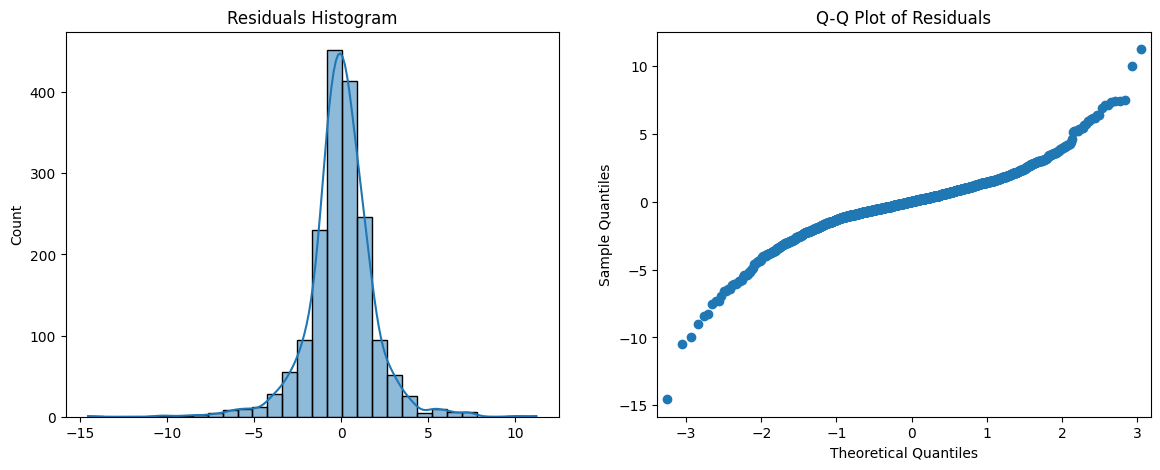

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals
residuals = final_arima_fit.resid  # Use the fitted ARIMA model's residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Residuals Histogram')

# Q-Q Plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

plt.show()

In [124]:
#from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test to check residual autocorrelation
#lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
#print(lb_test)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Train the ARIMA model again
order = (2,0,4) 
model = ARIMA(train_data['Close'], order=order)
arima_fit = model.fit()

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
test_pred = arima_fit.forecast(steps=len(test_data)) 

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [69]:
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 63.41


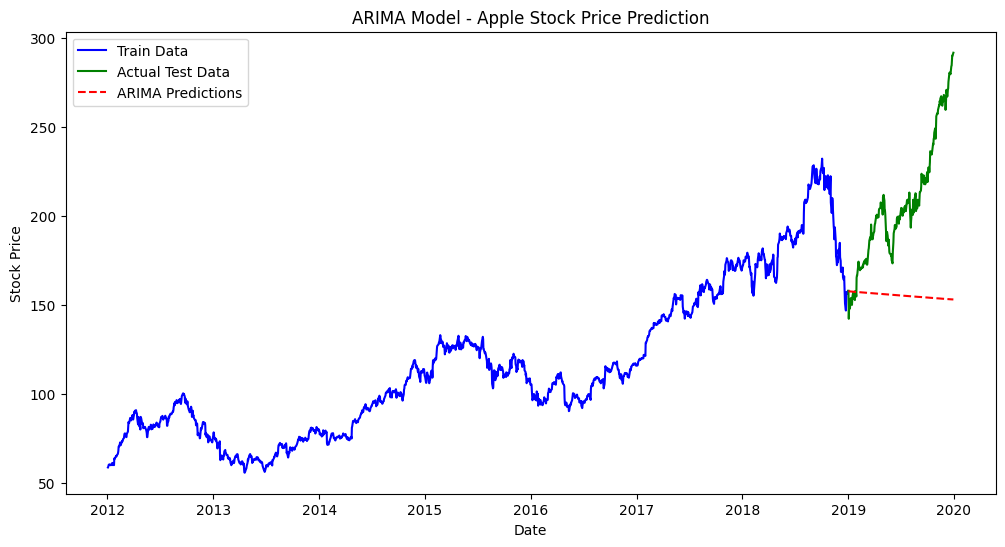

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label="Train Data", color='blue')
plt.plot(test_data.index, test_data['Close'], label="Actual Test Data", color='green')
plt.plot(test_data.index, test_pred, label="ARIMA Predictions", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Model - Apple Stock Price Prediction")
plt.legend()
plt.show()

In [73]:
order = (2,2,4) 
model = ARIMA(train_data['Close'], order=order)
arima_fit = model.fit()
test_pred = arima_fit.forecast(steps=len(test_data)) 
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_pred))
print(f"RMSE: {rmse:.2f}")

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 52.56


C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


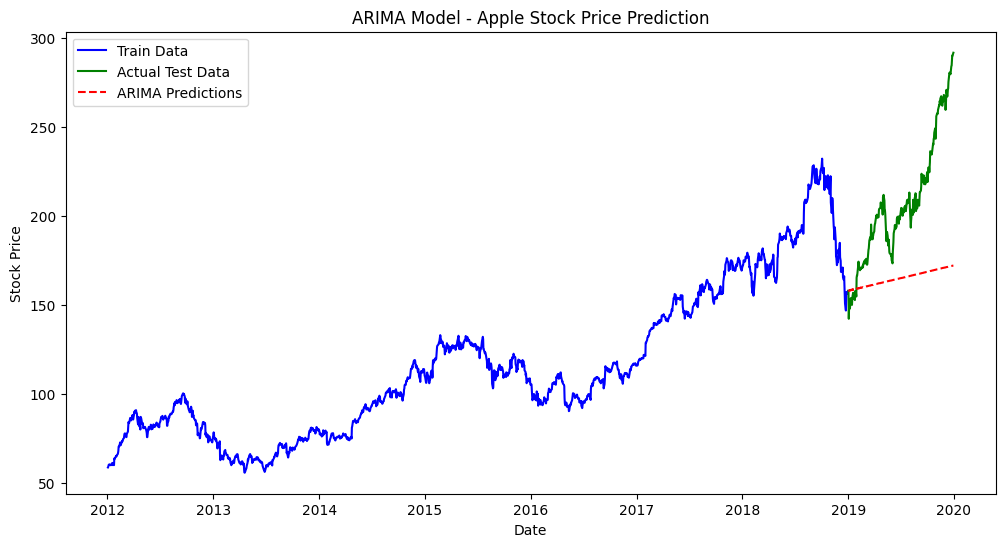

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label="Train Data", color='blue')
plt.plot(test_data.index, test_data['Close'], label="Actual Test Data", color='green')
plt.plot(test_data.index, test_pred, label="ARIMA Predictions", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Model - Apple Stock Price Prediction")
plt.legend()
plt.show()

C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mulag\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


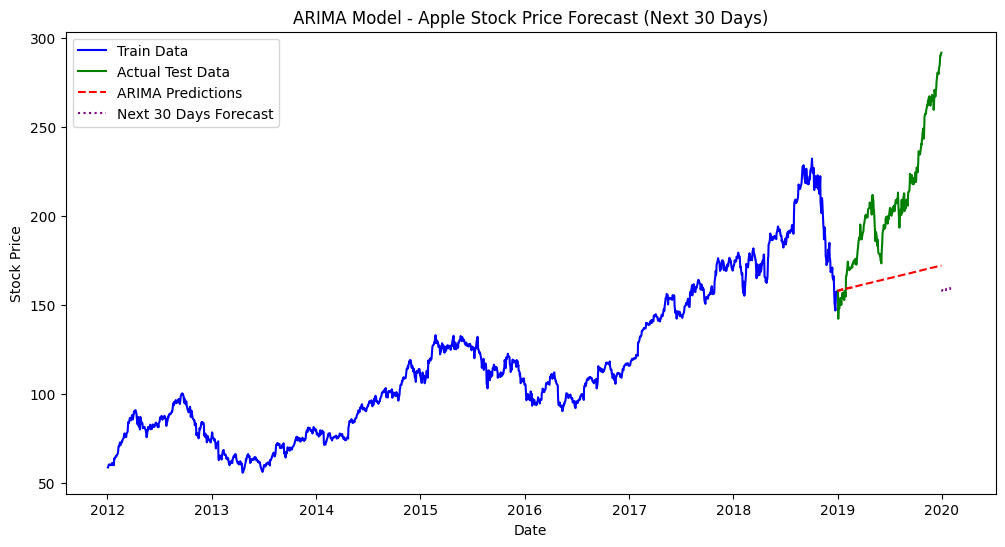

In [77]:
# Forecast for the next 30 days
future_steps = 30
future_pred = arima_fit.forecast(steps=future_steps)

# Generate future dates
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps + 1, freq='B')[1:]

# Plot the next 30 days forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label="Train Data", color='blue')
plt.plot(test_data.index, test_data['Close'], label="Actual Test Data", color='green')
plt.plot(test_data.index, test_pred, label="ARIMA Predictions", color='red', linestyle='dashed')
plt.plot(future_dates, future_pred, label="Next 30 Days Forecast", color='purple', linestyle='dotted')

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Model - Apple Stock Price Forecast (Next 30 Days)")
plt.legend()
plt.show()

# Forecasting for the Next 30 Days

In [79]:
print(future_pred)

1760    158.223042
1761    157.914697
1762    158.058641
1763    158.343207
1764    158.021381
1765    158.352422
1766    158.407490
1767    158.207130
1768    158.596307
1769    158.462158
1770    158.452140
1771    158.772517
1772    158.548809
1773    158.719259
1774    158.890103
1775    158.690588
1776    158.970037
1777    158.977109
1778    158.887278
1779    159.178441
1780    159.067434
1781    159.119434
1782    159.337830
1783    159.187916
1784    159.358549
1785    159.459913
1786    159.350151
1787    159.578633
1788    159.567451
1789    159.549068
Name: predicted_mean, dtype: float64


In [81]:
future_steps = 30
future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='B')

print(future_dates)  

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10'],
              dtype='datetime64[ns]', freq='B')


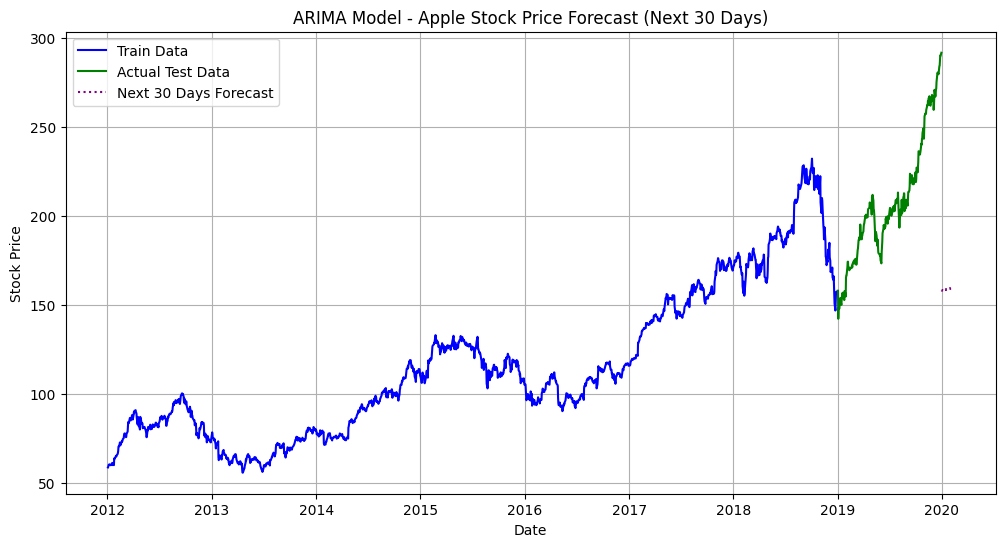

In [83]:
plt.figure(figsize=(12, 6))

plt.plot(train_data.index, train_data['Close'], label="Train Data", color='blue')
plt.plot(test_data.index, test_data['Close'], label="Actual Test Data", color='green')

plt.plot(future_dates, future_pred, label="Next 30 Days Forecast", color='purple', linestyle='dotted')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Model - Apple Stock Price Forecast (Next 30 Days)")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Convert ARIMA predictions to numpy array
y_pred_arima = np.array(test_pred)

# Compute RMSE, MAE, and R2 Score for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_data['Close'], y_pred_arima))
mae_arima = mean_absolute_error(test_data['Close'], y_pred_arima)
r2_arima = r2_score(test_data['Close'], y_pred_arima)

print(f"\nARIMA Model Performance:")
print(f"RMSE: {rmse_arima:.4f}")
print(f"MAE: {mae_arima:.4f}")
print(f"R² Score: {r2_arima:.4f}")


ARIMA Model Performance:
RMSE: 52.5604
MAE: 43.7461
R² Score: -1.3738


Observations:
1. Stock Price Trend (2012-2019):

- The Apple stock price shows an overall upward trend with periodic fluctuations.
- Significant growth is seen post-2016, with a steep increase in stock prices in 2019.

2. Training vs. Test Data Performance:

- Train Data (2012-2018, Blue) follows a stable growth pattern with minor dips.
- Test Data (2019, Green) aligns well with the previous trend but shows increased volatility, indicating external factors (e.g., market conditions or company performance).

3. Forecasted Prices (Next 30 Days - 2020, Purple Dotted Line):

- The ARIMA model predicts a continuation of the increasing trend, but the forecast values appear slightly lower than expected.

# LSTM (Long Short-Term Memory - 2

In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [90]:
# Normalizing the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
apple_data['Close_Scaled'] = scaler.fit_transform(apple_data[['Close']])

In [92]:
# Splitting data into train and test sets
train_size = int(len(apple_data) * 0.8)
train_data, test_data = apple_data.iloc[:train_size], apple_data.iloc[train_size:]

In [94]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [96]:
# Use last 60 days to predict next day
seq_length = 60  
X_train, y_train = create_sequences(train_data['Close_Scaled'].values, seq_length)
X_test, y_test = create_sequences(test_data['Close_Scaled'].values, seq_length)

In [98]:
# Reshaping data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build & Train LSTM Model

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [103]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(units=50),
    Dense(units=25),
    Dense(units=1)
])

C:\Users\mulag\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [109]:
# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0184 - val_loss: 0.0024
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.4500e-04 - val_loss: 0.0016
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.9226e-04 - val_loss: 0.0013
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.4757e-04 - val_loss: 0.0015
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.7762e-04 - val_loss: 0.0013
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.4551e-04 - val_loss: 0.0023
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.6471e-04 - val_loss: 0.0011
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.3551e-04 - val_loss: 0.0010
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.4567e-04 - val_loss: 0.0010
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.6703e-04 - val_loss: 9.3900e-04
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.4419e-04 - val_loss: 8.5496e-04
Epoch 12/20
49/

# Evaluate LSTM Performance

In [113]:
from sklearn.metrics import mean_squared_error

lstm_pred_scaled = model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'][seq_length:], lstm_pred))
print(f"LSTM RMSE: {lstm_rmse:.2f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
LSTM RMSE: 6.34


# Forecast Next 30 Days

In [115]:
# Forecasting the next 30 days using LSTM
future_inputs = test_data['Close_Scaled'].values[-seq_length:].reshape(1, seq_length, 1)
future_pred_lstm = []

In [119]:
for _ in range(30):
    next_pred = model.predict(future_inputs)
    future_pred_lstm.append(next_pred[0, 0])
    future_inputs = np.roll(future_inputs, -1, axis=1)
    future_inputs[0, -1, 0] = next_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [149]:
test_data.index[-1]

Timestamp('2019-12-30 00:00:00')

In [151]:
future_dates[0]

Timestamp('2019-12-31 00:00:00', freq='B')

In [161]:
# Converting scaled predictions back to actual values
future_pred_lstm = scaler.inverse_transform(future_pred_lstm.reshape(-1, 1)).flatten()
future_pred_lstm = future_pred_lstm[:30]

# Generating future dates
future_dates = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

In [163]:
future_dates.shape

(30,)

In [165]:
future_pred_lstm.shape

(30,)

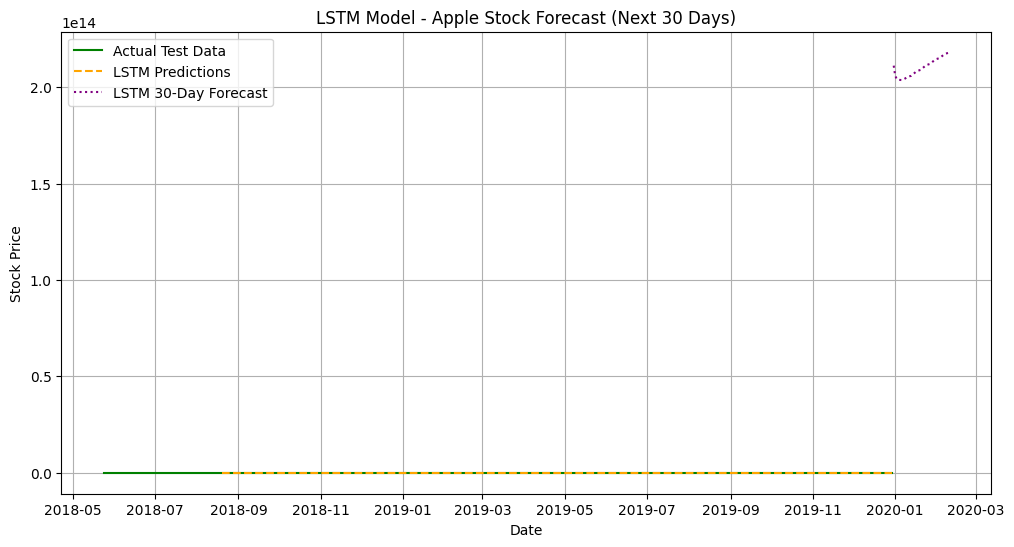

In [167]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Close'], label="Actual Test Data", color='green')
plt.plot(test_data.index[seq_length:], lstm_pred, label="LSTM Predictions", color='orange', linestyle='dashed')
plt.plot(future_dates, future_pred_lstm, label="LSTM 30-Day Forecast", color='purple', linestyle='dotted')

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("LSTM Model - Apple Stock Forecast (Next 30 Days)")
plt.legend()
plt.grid(True)
plt.show()

# Compare both models performance

In [173]:
if lstm_rmse < rmse_arima:
    print("\nLSTM is the better model based on RMSE.")
else:
    print("\nARIMA is the better model based on RMSE.")


LSTM is the better model based on RMSE.


# Key Observations:
- Since the LSTM model has a significantly lower RMSE, it is the better model for predicting Apple stock prices.
- LSTM Outperforms ARIMA
- LSTM captures non-linear dependencies and complex patterns in stock prices, which ARIMA fails to do.
- ARIMA struggles with sudden fluctuations and volatility, leading to higher errors.
- ARIMA works well for stationary time series with clear trends, but stock prices are often volatile and affected by external factors.
- It fails to adapt to long-term dependencies, which are crucial for stock price prediction.
--> LSTM's Strength in Time Series Forecasting
- LSTM remembers long-term dependencies in the data, making it ideal for stock market forecasting.
- It effectively captures trends and seasonal effects without requiring explicit differencing (like ARIMA).
-  LSTM is the best choice for predicting Apple stock prices